# **Predicting Loan Pay-Off Rate**


# 1. Introduction

In this project, we will analyse a loan dataset obtained from the Lending Club. We use the 2007 to 2011 dataset (LoanStats3a.csv) for the analysis. The goal of this project is to build a logistic regression model predicting the pay-off rate of borrowers.

The dataset can be downloaded [here](https://www.lendingclub.com/info/download-data.action).

# 2. Data Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

loan = pd.read_csv('LoanStats3a.csv', low_memory = False, skiprows = 1)
print("The loan dataset has {} samples with {} features.".format(*loan.shape))

The loan dataset has 42535 samples with 144 features.


In [0]:
loan = loan[["loan_amnt","term","int_rate","installment","grade","sub_grade","emp_length","home_ownership","annual_inc","verification_status","loan_status","total_acc","dti"]]

In [3]:
loan.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,total_acc,dti
0,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,9.0,27.65
1,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,4.0,1.00
2,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,10.0,8.72
3,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,37.0,20.00
4,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Fully Paid,38.0,17.94


# 3. Data Cleaning

In [4]:
loan.isnull().any()

loan_amnt              False
term                   False
int_rate               False
installment            False
grade                  False
sub_grade              False
emp_length              True
home_ownership         False
annual_inc              True
verification_status    False
loan_status            False
total_acc               True
dti                    False
dtype: bool

In [5]:
columns = ["term","sub_grade","emp_length","home_ownership","verification_status"]
for col in columns:
  print(loan[col].value_counts())
  print(' ')

 36 months    31534
 60 months    11001
Name: term, dtype: int64
 
B3    2997
A4    2905
B5    2807
A5    2793
B4    2590
C1    2264
C2    2157
B2    2113
B1    1882
A3    1823
C3    1658
A2    1520
D2    1485
C4    1370
D3    1322
C5    1291
A1    1142
D4    1140
D1    1053
D5    1016
E1     884
E2     791
E3     668
E4     552
E5     499
F1     392
F2     308
F3     236
F4     211
F5     154
G1     141
G2     107
G4      99
G5      86
G3      79
Name: sub_grade, dtype: int64
 
10+ years    9369
< 1 year     5062
2 years      4743
3 years      4364
4 years      3649
1 year       3595
5 years      3458
6 years      2375
7 years      1875
8 years      1592
9 years      1341
Name: emp_length, dtype: int64
 
RENT        20181
MORTGAGE    18959
OWN          3251
OTHER         136
NONE            8
Name: home_ownership, dtype: int64
 
Not Verified       18758
Verified           13471
Source Verified    10306
Name: verification_status, dtype: int64
 


In [6]:
loan.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             1112
home_ownership            0
annual_inc                4
verification_status       0
loan_status               0
total_acc                29
dti                       0
dtype: int64

In [7]:
mapping_emp_length = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0
    }
}
loan = loan.replace(mapping_emp_length)
mapping_term = {
    "term": {
        " 36 months": 1,
        " 60 months": 0
    }
}
loan = loan.replace(mapping_term)
mapping_grade= {
    "grade": {
        "A": 0, "B": 1, "C": 2, "D": 3, "E": 4, "F": 5, "G": 6
    }
}
loan = loan.replace(mapping_grade)
mapping_subgrade= {
    "sub_grade": {
        "A1":  0, "A2":  1, "A3":  2, "A4":  3, "A5":  4, 
        "B1":  5, "B2":  6, "B3":  7, "B4":  8, "B5":  9,
        "C1": 10, "C2": 11, "C3": 12, "C4": 13, "C5": 14,
        "D1": 15, "D2": 16, "D3": 17, "D4": 18, "D5": 19,
        "E1": 20, "E2": 21, "E3": 22, "E4": 23, "E5": 24,
        "F1": 25, "F2": 26, "F3": 27, "F4": 28, "F5": 29,
        "G1": 30, "G2": 31, "G3": 32, "G4": 33, "G5": 34,
    }
}
loan = loan.replace(mapping_subgrade)
mapping_homeownership= {
    "home_ownership": {
        "RENT": 0, "MORTGAGE": 1, "OWN": 2, "OTHER": 3, "NONE": 4
    }
}
loan = loan.replace(mapping_homeownership)
mapping_verification= {
    "verification_status": {
        "Not Verified": 0, "Verified": 1, "Source Verified": 2
    }
}
loan = loan.replace(mapping_verification)
loan["int_rate"] = loan["int_rate"].astype(str).str.strip('%').astype(float)
loan.fillna(0, inplace=True)
loan.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,total_acc,dti
0,5000,1,10.65,162.87,1,6,10.0,0,24000.0,1,Fully Paid,9.0,27.65
1,2500,0,15.27,59.83,2,13,0.0,0,30000.0,2,Charged Off,4.0,1.00
2,2400,1,15.96,84.33,2,14,10.0,0,12252.0,0,Fully Paid,10.0,8.72
3,10000,1,13.49,339.31,2,10,10.0,0,49200.0,2,Fully Paid,37.0,20.00
4,3000,0,12.69,67.79,1,9,1.0,0,80000.0,2,Fully Paid,38.0,17.94


In [8]:
loan['loan_status'].value_counts()

Fully Paid                                             34116
Charged Off                                             5670
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Name: loan_status, dtype: int64

In [9]:
status_replace = {
    "loan_status" : {
        "Fully Paid": 1,
        "Charged Off": 0,
        "Does not meet the credit policy. Status:Fully Paid": 1,
        "Does not meet the credit policy. Status:Charged Off": 0,
    }
}
loan = loan.replace(status_replace)
loan['loan_status'].value_counts()

1    36104
0     6431
Name: loan_status, dtype: int64

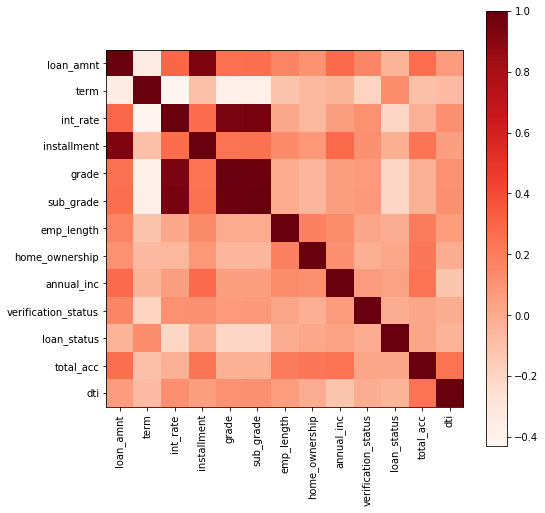

In [10]:
plt.figure(figsize= (8,8))
plt_list = ["loan_amnt","term","int_rate","installment","grade","sub_grade","emp_length","home_ownership","annual_inc","verification_status","loan_status","total_acc","dti"]
plt.imshow(loan[plt_list].corr(), cmap = plt.cm.Reds, interpolation = 'nearest')
plt.colorbar()

tick_marks = [i for i in range(len(loan[plt_list].columns))]
plt.xticks(tick_marks, loan[plt_list].columns, rotation = 'vertical')
plt.yticks(tick_marks, loan[plt_list].columns)
plt.show()

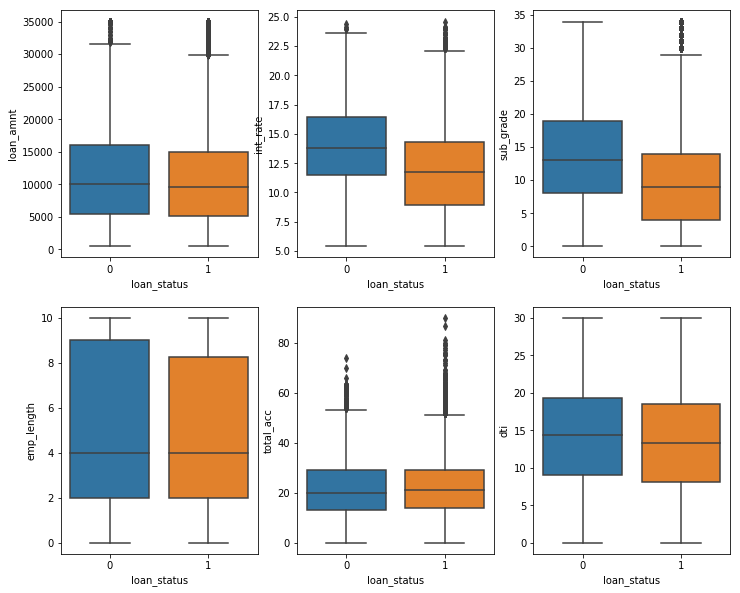

In [11]:
fig,axes = plt.subplots(2,3, figsize = (12,10))
plt_list = ["loan_amnt","int_rate","sub_grade","emp_length","total_acc","dti"]
for i,t in enumerate(plt_list):
  sns.boxplot(y = t, x = "loan_status", data= loan, ax = axes[i//3, i%3])

In [12]:
loan = loan.drop(["installment","grade","emp_length","total_acc","loan_amnt"], axis=1)
loan.head()

,term,int_rate,sub_grade,home_ownership,annual_inc,verification_status,loan_status,dti
0,1,10.65,6,0,24000.0,1,1,27.65
1,0,15.27,13,0,30000.0,2,0,1.00
2,1,15.96,14,0,12252.0,0,1,8.72
3,1,13.49,10,0,49200.0,2,1,20.00
4,0,12.69,9,0,80000.0,2,1,17.94


# 4. Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver='liblinear')
features = loan[loan.columns.drop('loan_status')]
target = loan['loan_status']
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.8551780886328906


# 5. Conclusion

I have applied the logistic regression model to predict the probability that a loan will be paid off from the LendingClub dataset. The model obtained an accuracy score of 0.855.

So far, the most important features for predicting paid-off rate are the interest rate, term, (sub)grade and debt-to-income ratio. However, there may be more interesting features which are not considered in this analysis. 